In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from scaler import DynamicScaler

# 1. Carregar o dataset
df = pd.read_csv("./data/case_data_science_credit.csv", sep=";")
print(f"Shape do dataset original: {df.shape}")

# 2. Selecionar apenas colunas numéricas (para escalonamento)
num_cols = df.select_dtypes(include=["number"]).columns.tolist()

# Remover colunas específicas
for col in ['client_id', 'target']:
    if col in num_cols:
        num_cols.remove(col)

print(f"Colunas numéricas para escalonamento: {num_cols}")

# 3. Separar em treino e teste
df_train, df_test = train_test_split(df, test_size=0.3, random_state=42)
print(f"Treino: {df_train.shape}, Teste: {df_test.shape}")

Shape do dataset original: (67463, 18)
Colunas numéricas para escalonamento: ['qtd_restritivos', 'razao_credito_tomado_vs_renda_informada', 'patrimonio_total', 'qtd_atrasos_ultimos_2a', 'valor_total_recuperacoes_ultimos_2a', 'contas_distintas_com_atraso', 'qtd_consultas_ultimos_6m', 'qtd_linhas_credito_abertas', 'saldo_rotativo_total', 'limite_rotativo_total', 'valor_total_emprestimos_tomados', 'taxa_juros_media_emprestimos_tomados']
Treino: (47224, 18), Teste: (20239, 18)


In [ ]:
# 4. Aplicar o DynamicScaler no treino
scaler = DynamicScaler(
    strategy="auto",
    shapiro_p_val = 0.01, # se aumentar fica mais restritiva a escolha de StandardScaler()
    serialize=True,
    save_path="scalers.pkl", # arquivo com informações de escalonamento salvas 
    random_state=42
)

scaler.fit(df_train[num_cols])

INFO: Coluna 'qtd_restritivos' → QuantileTransformer (p=0.000, skew=6.29, kurt=53.4) | motivo: assimetria/kurtosis extrema
INFO: Coluna 'razao_credito_tomado_vs_renda_informada' → MinMaxScaler (p=0.000, skew=0.09, kurt=-0.9) | motivo: default
INFO: Coluna 'patrimonio_total' → RobustScaler (p=0.000, skew=2.14, kurt=7.1) | motivo: skew moderado/outliers
INFO: Coluna 'qtd_atrasos_ultimos_2a' → QuantileTransformer (p=0.000, skew=4.66, kurt=31.1) | motivo: assimetria/kurtosis extrema
INFO: Coluna 'valor_total_recuperacoes_ultimos_2a' → QuantileTransformer (p=0.000, skew=7.50, kurt=60.3) | motivo: assimetria/kurtosis extrema
INFO: Coluna 'contas_distintas_com_atraso' → None (p=nan, skew=nan, kurt=nan) | motivo: constante
INFO: Coluna 'qtd_consultas_ultimos_6m' → QuantileTransformer (p=0.000, skew=3.73, kurt=15.3) | motivo: assimetria/kurtosis extrema
INFO: Coluna 'qtd_linhas_credito_abertas' → RobustScaler (p=0.000, skew=1.46, kurt=1.8) | motivo: skew moderado/outliers
INFO: Coluna 'saldo_ro

ScalerSelector(logger=<Logger ScalerSelector (INFO)>, random_state=42,
               save_path=WindowsPath('scalers.pkl'), serialize=True)

In [3]:
# Relatório das decisões
print("\nResumo das decisões por feature:")
display(scaler.report_as_df())


Resumo das decisões por feature:


,p_value,skew,kurtosis,reason,scaler
qtd_restritivos,2.109904e-89,6.290538,53.434908,assimetria/kurtosis extrema,QuantileTransformer
razao_credito_tomado_vs_renda_informada,6.492469e-27,0.085670,-0.909655,default,MinMaxScaler
patrimonio_total,1.171755e-58,2.143766,7.078947,skew moderado/outliers,RobustScaler
qtd_atrasos_ultimos_2a,3.045545e-82,4.664254,31.115407,assimetria/kurtosis extrema,QuantileTransformer
valor_total_recuperacoes_ultimos_2a,3.269532e-92,7.495621,60.267951,assimetria/kurtosis extrema,QuantileTransformer
qtd_consultas_ultimos_6m,4.935567e-86,3.727132,15.295197,assimetria/kurtosis extrema,QuantileTransformer
qtd_linhas_credito_abertas,3.667445e-56,1.463111,1.796902,skew moderado/outliers,RobustScaler
saldo_rotativo_total,3.111374e-63,2.922760,16.374107,skew moderado/outliers,RobustScaler
limite_rotativo_total,1.566123e-57,1.978827,5.929917,skew moderado/outliers,RobustScaler
valor_total_emprestimos_tomados,4.056848e-30,0.285322,-0.792298,default,MinMaxScaler


In [4]:
display(df_train[num_cols].head())

# 5. Transformar o conjunto de treino
X_train_scaled = scaler.transform(df_train[num_cols], return_df=True)

print("\nExemplo de dados escalados (treino):")
display(X_train_scaled.head())

,qtd_restritivos,razao_credito_tomado_vs_renda_informada,patrimonio_total,qtd_atrasos_ultimos_2a,valor_total_recuperacoes_ultimos_2a,contas_distintas_com_atraso,qtd_consultas_ultimos_6m,qtd_linhas_credito_abertas,saldo_rotativo_total,limite_rotativo_total,valor_total_emprestimos_tomados,taxa_juros_media_emprestimos_tomados
10823,0,31.904233,49591.35011,0,7.037046,0,0,14,9126,7697,5784,11.154593
56039,0,20.329191,58654.77591,1,3075.908451,0,0,8,15137,56296,19462,9.203992
32457,0,32.012076,71289.34266,0,3.766088,0,0,10,604,25222,30348,10.323713
43496,0,20.265629,66101.82345,0,7.138711,0,0,19,10079,62191,19156,8.711736
50204,1,20.363201,70478.22719,1,2.111264,0,0,11,11949,10611,18358,9.587092



Exemplo de dados escalados (treino):


,qtd_restritivos,razao_credito_tomado_vs_renda_informada,patrimonio_total,qtd_atrasos_ultimos_2a,valor_total_recuperacoes_ultimos_2a,contas_distintas_com_atraso,qtd_consultas_ultimos_6m,qtd_linhas_credito_abertas,saldo_rotativo_total,limite_rotativo_total,valor_total_emprestimos_tomados,taxa_juros_media_emprestimos_tomados
10823,-5.199338,0.801717,-0.460009,-5.199338,1.144808,0,-5.199338,0.166667,0.469466,-0.380262,0.140352,-0.045575
56039,-5.199338,0.504560,-0.249843,1.079690,2.629059,0,-5.199338,-0.833333,1.255089,1.645983,0.542812,-0.442675
32457,-5.199338,0.804486,0.043131,-5.199338,0.148749,0,-5.199338,-0.500000,-0.644339,0.350410,0.863120,-0.214724
43496,-5.199338,0.502928,-0.077159,-5.199338,1.174832,0,-5.199338,1.000000,0.594021,1.891765,0.533808,-0.542887
50204,1.780005,0.505433,0.024323,1.079690,-0.457881,0,-5.199338,-0.333333,0.838425,-0.258769,0.510328,-0.364684


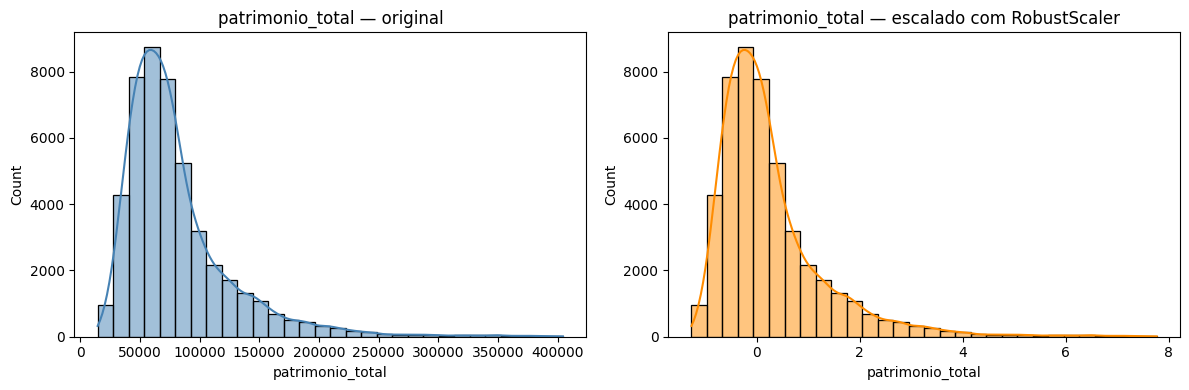

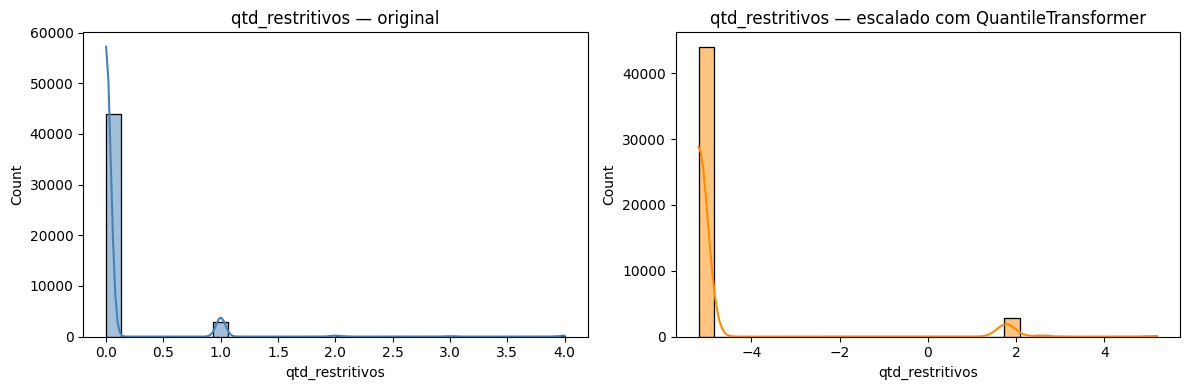

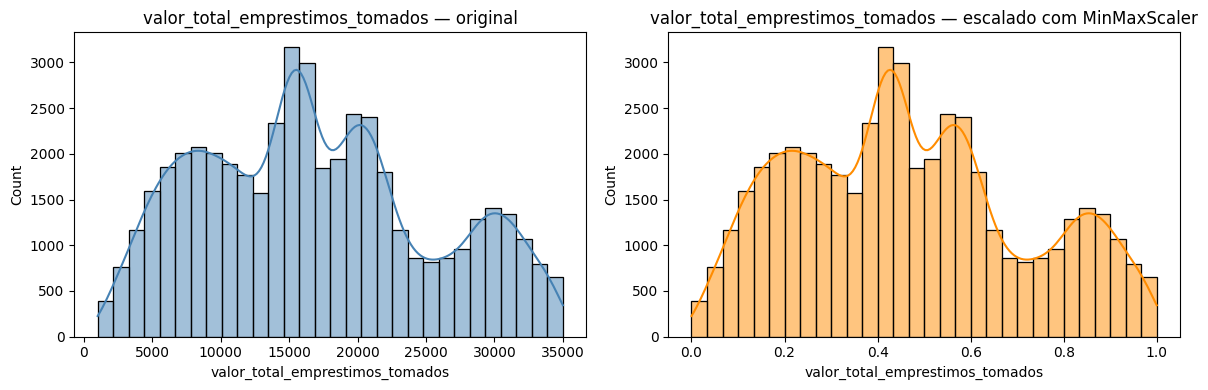

In [5]:
# Visualizar
scaler.plot_histograms(
    df_train,
    X_train_scaled,
    features=[
        "patrimonio_total",                 # RobustScaler
        "qtd_restritivos",                  # QuantileTransformer
        "valor_total_emprestimos_tomados",  # MinMaxScaler
        ])

In [ ]:
# 6. Carregar o scaler salvo e aplicar no teste
scaler_test = DynamicScaler()
scaler_test.load("scalers.pkl")

display(df_test[num_cols].head())

X_test_scaled = scaler_test.transform(df_test[num_cols], return_df=True)

print("\nExemplo de dados escalados (teste):")
display(X_test_scaled.head())

INFO: Scalers carregados de scalers.pkl


,qtd_restritivos,razao_credito_tomado_vs_renda_informada,patrimonio_total,qtd_atrasos_ultimos_2a,valor_total_recuperacoes_ultimos_2a,contas_distintas_com_atraso,qtd_consultas_ultimos_6m,qtd_linhas_credito_abertas,saldo_rotativo_total,limite_rotativo_total,valor_total_emprestimos_tomados,taxa_juros_media_emprestimos_tomados
56094,0,17.621745,25906.04772,7,1.810870,0,0,14,5847,20974,8984,6.032459
34597,1,23.674993,92803.30262,0,3.115843,0,0,30,1829,39945,27684,9.384627
1791,0,9.473331,33040.85422,0,5.036486,0,0,9,2829,14142,21374,6.470937
38453,0,6.875724,81012.45458,0,4.207038,0,0,12,5982,35830,32775,18.955803
12959,0,24.763439,98524.20707,0,2.197198,0,0,10,1828,6209,3576,12.644970



Exemplo de dados escalados (teste):


,qtd_restritivos,razao_credito_tomado_vs_renda_informada,patrimonio_total,qtd_atrasos_ultimos_2a,valor_total_recuperacoes_ultimos_2a,contas_distintas_com_atraso,qtd_consultas_ultimos_6m,qtd_linhas_credito_abertas,saldo_rotativo_total,limite_rotativo_total,valor_total_emprestimos_tomados,taxa_juros_media_emprestimos_tomados
56094,-5.199338,0.435053,-1.009232,2.806711,-0.594316,0,-5.199338,0.166667,0.040908,0.173298,0.234508,-1.088330
34597,1.780005,0.590454,0.542004,-5.199338,-0.077240,0,-5.199338,2.833333,-0.484235,0.964259,0.784735,-0.405902
1791,-5.199338,0.225865,-0.843787,-5.199338,0.555957,0,-5.199338,-0.666667,-0.353537,-0.111550,0.599070,-0.999065
38453,-5.199338,0.159179,0.268594,-5.199338,0.294314,0,-5.199338,-0.166667,0.058553,0.792691,0.934532,1.542580
12959,-5.199338,0.618397,0.674662,-5.199338,-0.417131,0,-5.199338,-0.500000,-0.484365,-0.442302,0.075384,0.257833
